In [260]:
from datetime import datetime
import pandas as pd
import os
import dateutil.parser as date_parser
import matplotlib.pyplot as plt
from typing import Any
import seaborn as sns
import numpy as np

## Load timeseries ticker data
### There are 3 tickers analysis is based on:
- S&P 500
- VIX - Volatility index
- US Treasury bonds

The analysis period is from 2000 to 2024

In [219]:
snp_path = os.path.join(os.getcwd(), 'assets', 's&p500_max.csv')
vix_path = os.path.join(os.getcwd(), 'assets', 'vix_max.csv')
us_treasury_bonds_path = os.path.join(os.getcwd(), 'assets', 'us_bonds_max.csv')

snp_data = pd.read_csv(snp_path, index_col='date', parse_dates=True)
vix_data = pd.read_csv(vix_path, index_col='date', parse_dates=True)
bonds_data = pd.read_csv(us_treasury_bonds_path, index_col='date', parse_dates=True)

start_date = '2000-01-01'
end_date = '2024-01-01'

snp_data = snp_data.loc[start_date:end_date]
vix_data = vix_data.loc[start_date:end_date]
bonds_data = bonds_data.loc[start_date:end_date]

common_index = snp_data.index.intersection(vix_data.index).intersection(bonds_data.index)
snp_data['close'] = snp_data['close'].reindex(common_index)
vix_data['close'] = vix_data['close'].reindex(common_index)
bonds_data['close'] = bonds_data['close'].reindex(common_index)

### S&P 500

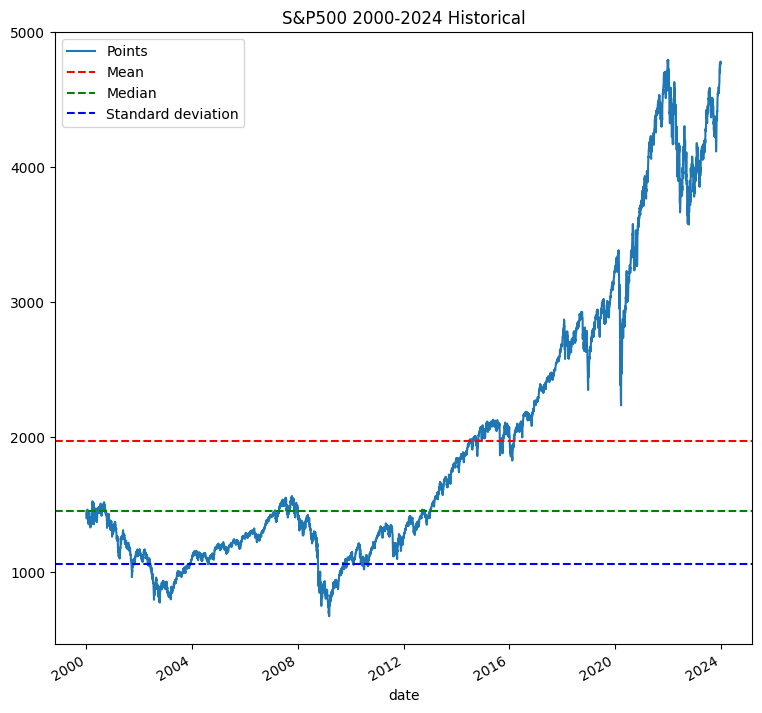

In [220]:
snp_plot = snp_data.plot(title='S&P500 2000-2024 Historical', y='close', label='Points', figsize=(9, 9))
snp_mean = snp_data['close'].mean()
snp_median = snp_data['close'].median()
snp_std = snp_data['close'].std()

snp_plot.axhline(y=snp_mean, label='Mean', color='r', linestyle='dashed')
snp_plot.axhline(y=snp_median, label='Median', color='g', linestyle='dashed')
snp_plot.axhline(y=snp_std, label='Standard deviation', color='b', linestyle='dashed')

snp_plot.legend()

### VIX

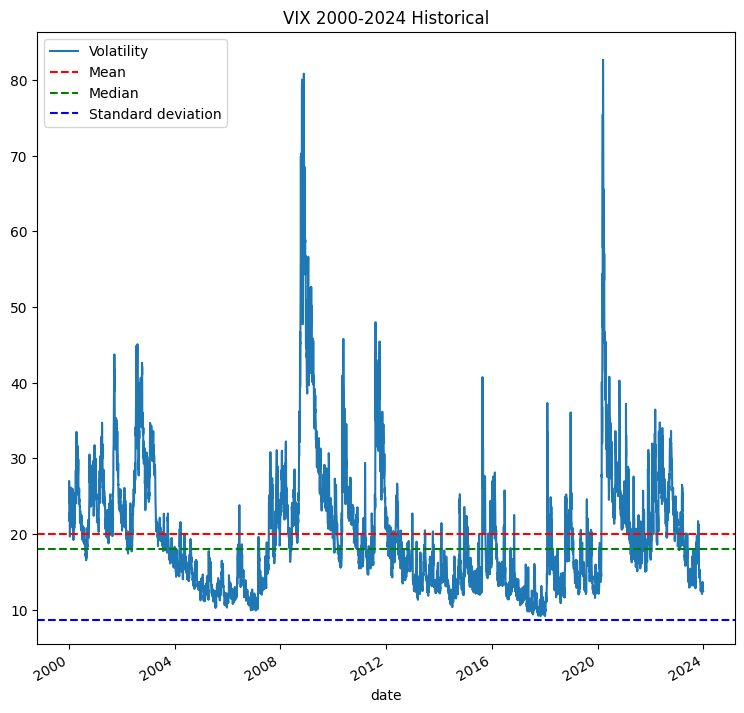

In [221]:
vix_plot = vix_data.plot(title='VIX 2000-2024 Historical', y='close', figsize=(9, 9), label='Volatility')

vix_mean = vix_data['close'].mean()
vix_median = vix_data['close'].median()
vix_std = vix_data['close'].std()

vix_plot.axhline(y=vix_mean, label='Mean', color='r', linestyle='dashed')
vix_plot.axhline(y=vix_median, label='Median', color='g', linestyle='dashed')
vix_plot.axhline(y=vix_std, label='Standard deviation', color='b', linestyle='dashed')

vix_plot.legend()

### US Bonds

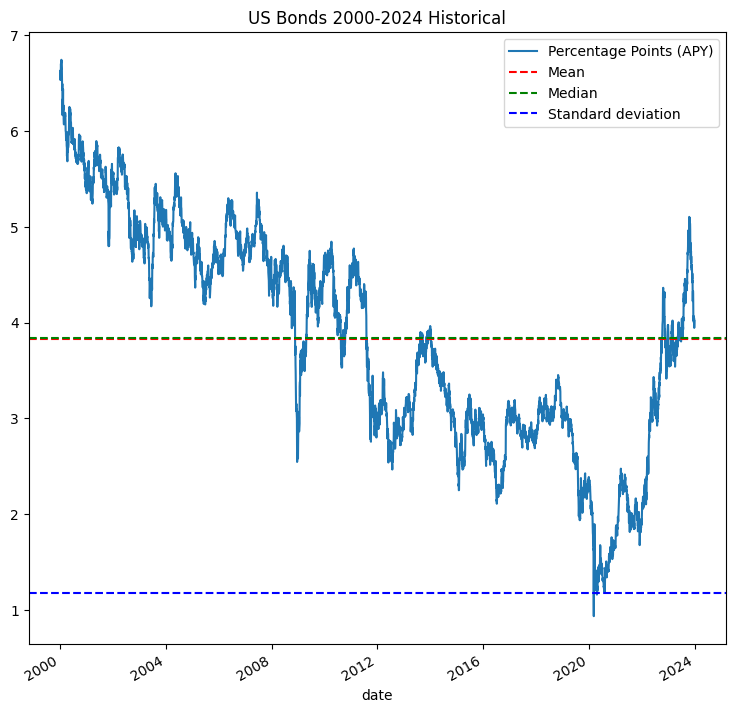

In [222]:
bonds_plot = bonds_data.plot(title='US Bonds 2000-2024 Historical', y='close',
                             label='Percentage Points (APY)', figsize=(9, 9))

bonds_mean = bonds_data['close'].mean()
bonds_median = bonds_data['close'].median()
bonds_std = bonds_data['close'].std()

bonds_plot.axhline(y=bonds_mean, label='Mean', color='r', linestyle='dashed')
bonds_plot.axhline(y=bonds_median, label='Median', color='g', linestyle='dashed')
bonds_plot.axhline(y=bonds_std, label='Standard deviation', color='b', linestyle='dashed')

bonds_plot.legend()

### Heatmap correlation matrix between S&P, VIX and US Bonds

Text(0.5, 1.0, 'Correlation matrix')

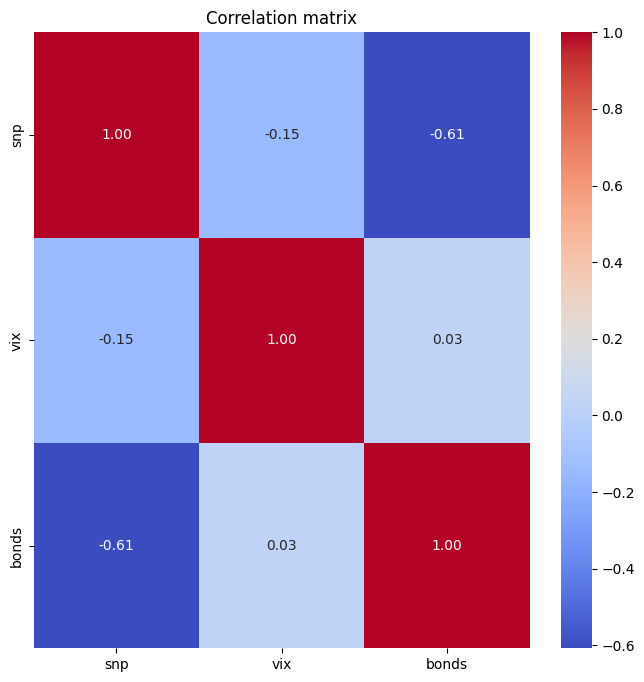

In [259]:
matrix_df = pd.DataFrame({
    'snp': snp_data['close'],
    'vix': vix_data['close'],
    'bonds': bonds_data['close']
})

corr_matrix_df = matrix_df.corr()

fig, ax = plt.subplots(figsize=(8, 8))

heatmap = sns.heatmap(corr_matrix_df, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
heatmap.set_title('Correlation matrix')

### Simple correlation between between S&P, VIX and US Bonds

Text(0.5, 1.0, 'Simple correlation')

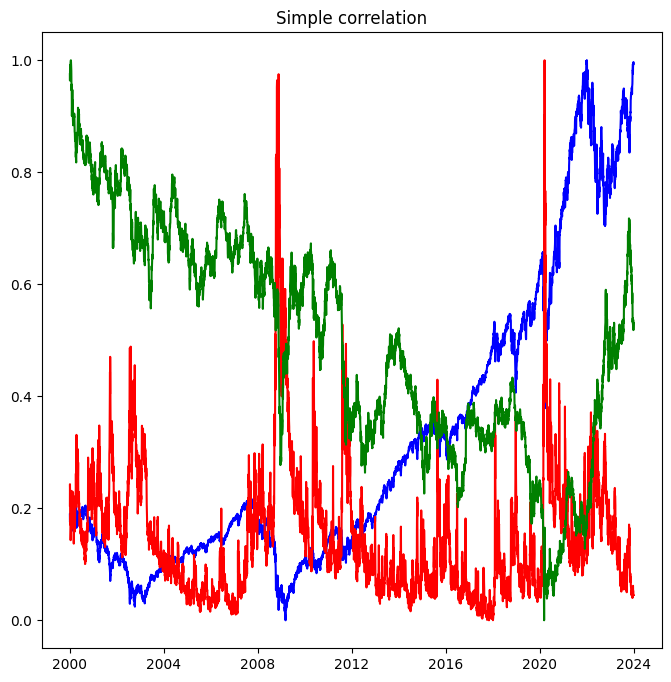

In [285]:
fig, ax = plt.subplots(figsize=(8, 8))

snp_norm = (snp_data['close'] - snp_data['close'].min()) / (snp_data['close'].max() - snp_data['close'].min())
vix_norm = (vix_data['close'] - vix_data['close'].min()) / (vix_data['close'].max() - vix_data['close'].min())
bonds_norm = (bonds_data['close'] - bonds_data['close'].min()) / (bonds_data['close'].max() - bonds_data['close'].min())

ax.plot(snp_norm.index, snp_norm, color='b')
ax.plot(vix_norm.index, vix_norm, color='r')
ax.plot(bonds_norm.index, bonds_norm, color='g')
ax.set_title('Simple correlation')

### Data model synthesis
#### Characteristics used:
- Mean
- Median
- Std

TypeError: unhashable type: 'numpy.ndarray'

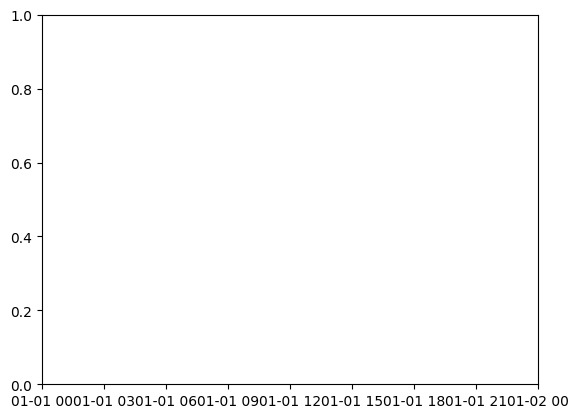

In [284]:
snp_synthetic = np.random.normal(loc=snp_mean, scale=snp_std, size=len(snp_data['close']))

fig, ax = plt.subplots()
ax.plot(snp_data.index, snp_data)
ax.plot(snp_data.index, snp_synthetic)
print(snp_synthetic)